<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Modelo-Compartimental/codigo_modelo_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEIR (Susceptível - Exposto - Infectado - Recuperado)

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv


# Análise do Dados do Brasil

Calculo para Taxa de Infecção/Transmissão para o Brasil

In [5]:
file_path = "./dataset_Brasil_usableData.csv"
brasilDataSet = pd.read_csv(file_path, encoding='latin1')
brasilDataSet.head()

,Unnamed: 0,date,totalCases,deaths,suspects,recovered,tests,vaccinated,vaccinated_second,activeCases,newVaccinated,newVaccinated_second
0,293,2020-03-22,1594,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,321,2020-03-23,1952,34,15867.0,8.0,NaN,NaN,NaN,1910.0,NaN,NaN
2,349,2020-03-24,2255,47,17700.0,20.0,NaN,NaN,NaN,2188.0,NaN,NaN
3,377,2020-03-25,2566,59,27227.0,27.0,NaN,NaN,NaN,2480.0,NaN,NaN
4,405,2020-03-26,2990,77,50012.0,42.0,NaN,NaN,NaN,2871.0,NaN,NaN


In [6]:
# Explicação o calculo para extraí taxa de tramissão

# Taxa de transmissão comunitária de COVID-19 em 14 dias: 
# soma de todos os NOVOS casos de COVID-19 nos últimos 14 dias,
# dividido pela população e multiplicado por 100.000 = taxa de casos novos por 100.000 habitantes nos últimos 14 dias.

# taxaInfeccaoBrasil = ((totalCases[14] - totalCases[0]) / populacaoBrasil) * 100.000

In [7]:
populacaoBrasil = 212600000
#taxaInfeccaoBrasilCalculo = ((brasilDataSet.totalCases[14] - brasilDataSet.totalCases[0])/ populacaoBrasil) * 100000
taxaInfeccaoBrasilCalculo = 1.78
taxaInfeccaoBrasilCalculo

1.78

Modelo SEIR para os Dados do Brasil

In [22]:
I0_Brasil = 1 # # Número Inicial de Indivíduos Infectados no Brasil

R0_Brasil = 0 # Número Inicial de Indivíduos Recuperados no Brasil

S0_Brasil = populacaoBrasil - I0_Brasil - R0_Brasil # S0 = Suscetíveis à infecção inicialmente

E_Brasil = 200

E0_Brasil = 0

taxaIncubacao_Brasil = 0.3

taxaInfeccaoBrasil = taxaInfeccaoBrasilCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Brasil = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Brasil = np.linspace(0, 40, 40)

In [27]:
def equacoesSEIRs(y_Brasil, tempo_Brasil, populacaoBrasil, E_Brasil, taxaIncubacao_Brasil, taxaInfeccaoBrasil, gama_Brasil):
    S, E_Brasil, I, R = y_Brasil
    dSdt = -taxaInfeccaoBrasil * S * I / populacaoBrasil
    dEdt = taxaInfeccaoBrasil * S * I / populacaoBrasil - taxaIncubacao_Brasil * E_Brasil
    dIdt = taxaIncubacao_Brasil * E_Brasil - gama_Brasil * I
    dRdt = gama_Brasil * I
    return dSdt, dEdt, dIdt, dRdt

y0_Brasil = S0_Brasil, E0_Brasil, I0_Brasil, R0_Brasil

i = odeint(equacoesSEIRs, y0_Brasil, tempo_Brasil, args=(populacaoBrasil, E_Brasil, taxaIncubacao_Brasil, taxaInfeccaoBrasil, gama_Brasil))
S, E_Brasil, I, R = i.T

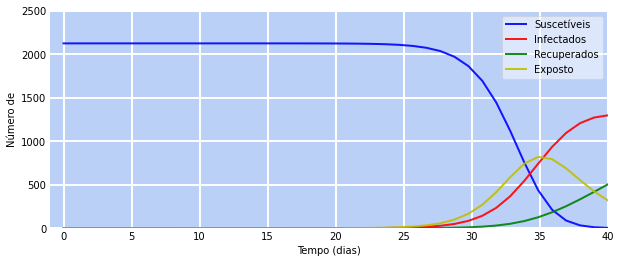

In [30]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Brasil, S/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Brasil, I/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_Brasil, R/100000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_Brasil, E_Brasil/100000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=2500)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Análise dos Dados da Paraíba

Calculo para Taxa de Infecção/Transmissão para a Paraíba

In [31]:
populacaoParaiba = 4039277
# taxaInfeccaoParaibaCalculo = ((paraibaDataSet.totalCases[14] - paraibaDataSet.totalCases[0])/ populacaoParaiba) * 100000
taxaInfeccaoParaibaCalculo = 2.47
taxaInfeccaoParaibaCalculo

2.47

In [32]:
I0_Paraiba = 1 # # Número Inicial de Indivíduos Infectados no Paraiba

R0_Paraiba = 0 # Número Inicial de Indivíduos Recuperados no Paraiba

S0_Paraiba = populacaoParaiba - I0_Paraiba - R0_Paraiba # S0 = Suscetíveis à infecção inicialmente

E_Paraiba = 200

E0_Paraiba = 0

taxaIncubacao_Paraiba = 0.3

taxaInfeccaoParaiba = taxaInfeccaoParaibaCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Paraiba = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Paraiba = np.linspace(0, 40, 40)

In [33]:
def equacoesSEIRs(y_Paraiba, tempo_Paraiba, populacaoParaiba, E_Paraiba, taxaIncubacao_Paraiba, taxaInfeccaoParaiba, gama_Paraiba):
    S, E_Paraiba, I, R = y_Paraiba
    dSdt = -taxaInfeccaoParaiba * S * I / populacaoParaiba
    dEdt = taxaInfeccaoParaiba * S * I / populacaoParaiba - taxaIncubacao_Paraiba * E_Paraiba
    dIdt = taxaIncubacao_Paraiba * E_Paraiba - gama_Paraiba * I
    dRdt = gama_Paraiba * I
    return dSdt, dEdt, dIdt, dRdt

y0_Paraiba = S0_Paraiba, E0_Paraiba, I0_Paraiba, R0_Paraiba

i = odeint(equacoesSEIRs, y0_Paraiba, tempo_Paraiba, args=(populacaoParaiba, E_Paraiba, taxaIncubacao_Paraiba, taxaInfeccaoParaiba, gama_Paraiba))
S, E_Paraiba, I, R = i.T

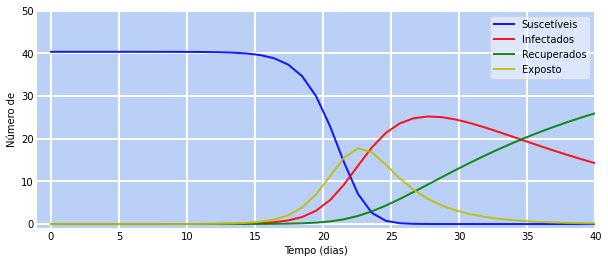

In [38]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Paraiba, S/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Paraiba, I/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_Paraiba, R/100000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_Paraiba, E_Paraiba/100000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=50)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Análise dos Dados de Campina Grande

In [39]:
populacaoCampinaGrande = 411807
# taxaInfeccaoCampinaGrandeCalculo = ((campinaGrandeDataSet.cum_casos[14] - campinaGrandeDataSet.cum_casos[0])/ populacaoCampinaGrande) * 100000
taxaInfeccaoCampinaGrandeCalculo = 2.47
taxaInfeccaoCampinaGrandeCalculo

2.47

In [40]:
I0_CampinaGrande = 1 # # Número Inicial de Indivíduos Infectados no CampinaGrande

R0_CampinaGrande = 0 # Número Inicial de Indivíduos Recuperados no CampinaGrande

S0_CampinaGrande = populacaoCampinaGrande - I0_CampinaGrande - R0_CampinaGrande # S0 = Suscetíveis à infecção inicialmente

E_CampinaGrande = 200

E0_CampinaGrande = 0

taxaIncubacao_CampinaGrande = 0.3

taxaInfeccaoCampinaGrande = taxaInfeccaoCampinaGrandeCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_CampinaGrande = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_CampinaGrande = np.linspace(0, 40, 40)

In [41]:
def equacoesSEIRs(y_CampinaGrande, tempo_CampinaGrande, populacaoCampinaGrande, E_CampinaGrande, taxaIncubacao_CampinaGrande, taxaInfeccaoCampinaGrande, gama_CampinaGrande):
    S, E_CampinaGrande, I, R = y_CampinaGrande
    dSdt = -taxaInfeccaoCampinaGrande * S * I / populacaoCampinaGrande
    dEdt = taxaInfeccaoCampinaGrande * S * I / populacaoCampinaGrande - taxaIncubacao_CampinaGrande * E_CampinaGrande
    dIdt = taxaIncubacao_CampinaGrande * E_CampinaGrande - gama_CampinaGrande * I
    dRdt = gama_CampinaGrande * I
    return dSdt, dEdt, dIdt, dRdt

y0_CampinaGrande = S0_CampinaGrande, E0_CampinaGrande, I0_CampinaGrande, R0_CampinaGrande

i = odeint(equacoesSEIRs, y0_CampinaGrande, tempo_CampinaGrande, args=(populacaoCampinaGrande, E_CampinaGrande, taxaIncubacao_CampinaGrande, taxaInfeccaoCampinaGrande, gama_CampinaGrande))
S, E_CampinaGrande, I, R = i.T

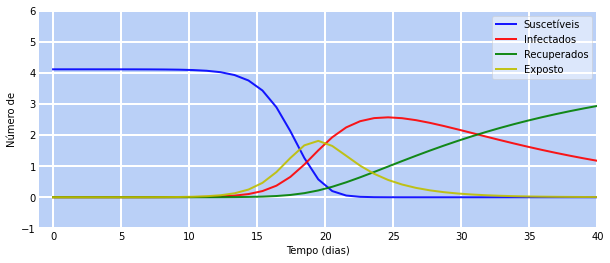

In [44]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_CampinaGrande, S/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_CampinaGrande, I/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_CampinaGrande, R/100000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_CampinaGrande, E_CampinaGrande/100000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=6)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Análise dos Dados dos Bairros

Modelo SIS para os Dados do bairro de Bodocongó



In [45]:
populacaoBodocongo = 3938
# taxaInfeccaoBodocongoCalculo = ((BodocongoDataSet.cum_casos[14] - BodocongoDataSet.cum_casos[0])/ populacaoBodocongo) * 100000
taxaInfeccaoBodocongoCalculo = 2.47
taxaInfeccaoBodocongoCalculo

2.47

In [46]:
I0_Bodocongo = 1 # # Número Inicial de Indivíduos Infectados no Bodocongo

R0_Bodocongo = 0 # Número Inicial de Indivíduos Recuperados no Bodocongo

S0_Bodocongo = populacaoBodocongo - I0_Bodocongo - R0_Bodocongo # S0 = Suscetíveis à infecção inicialmente

E_Bodocongo = 200

E0_Bodocongo = 0

taxaIncubacao_Bodocongo = 0.3

taxaInfeccaoBodocongo = taxaInfeccaoBodocongoCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Bodocongo = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Bodocongo = np.linspace(0, 40, 40)

In [47]:
def equacoesSEIRs(y_Bodocongo, tempo_Bodocongo, populacaoBodocongo, E_Bodocongo, taxaIncubacao_Bodocongo, taxaInfeccaoBodocongo, gama_Bodocongo):
    S, E_Bodocongo, I, R = y_Bodocongo
    dSdt = -taxaInfeccaoBodocongo * S * I / populacaoBodocongo
    dEdt = taxaInfeccaoBodocongo * S * I / populacaoBodocongo - taxaIncubacao_Bodocongo * E_Bodocongo
    dIdt = taxaIncubacao_Bodocongo * E_Bodocongo - gama_Bodocongo * I
    dRdt = gama_Bodocongo * I
    return dSdt, dEdt, dIdt, dRdt

y0_Bodocongo = S0_Bodocongo, E0_Bodocongo, I0_Bodocongo, R0_Bodocongo

i = odeint(equacoesSEIRs, y0_Bodocongo, tempo_Bodocongo, args=(populacaoBodocongo, E_Bodocongo, taxaIncubacao_Bodocongo, taxaInfeccaoBodocongo, gama_Bodocongo))
S, E_Bodocongo, I, R = i.T

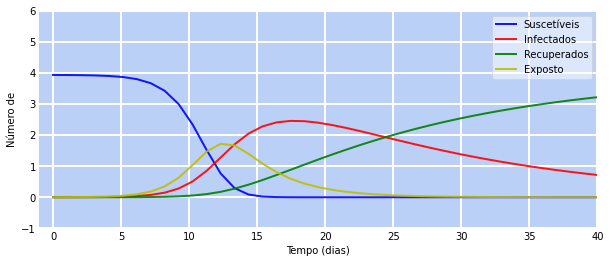

In [49]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Bodocongo, S/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Bodocongo, I/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_Bodocongo, R/1000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_Bodocongo, E_Bodocongo/1000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=6)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Modelo SIS para os Dados do bairro do Catolé

In [50]:
populacaoCatole = 5896
# taxaInfeccaoCatoleCalculo = ((CatoleDataSet.cum_casos[14] - CatoleDataSet.cum_casos[0])/ populacaoCatole) * 100000
taxaInfeccaoCatoleCalculo = 2.47
taxaInfeccaoCatoleCalculo

2.47

In [51]:
I0_Catole = 1 # # Número Inicial de Indivíduos Infectados no Catole

R0_Catole = 0 # Número Inicial de Indivíduos Recuperados no Catole

S0_Catole = populacaoCatole - I0_Catole - R0_Catole # S0 = Suscetíveis à infecção inicialmente

E_Catole = 200

E0_Catole = 0

taxaIncubacao_Catole = 0.3

taxaInfeccaoCatole = taxaInfeccaoCatoleCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Catole = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Catole = np.linspace(0, 40, 40)

In [52]:
def equacoesSEIRs(y_Catole, tempo_Catole, populacaoCatole, E_Catole, taxaIncubacao_Catole, taxaInfeccaoCatole, gama_Catole):
    S, E_Catole, I, R = y_Catole
    dSdt = -taxaInfeccaoCatole * S * I / populacaoCatole
    dEdt = taxaInfeccaoCatole * S * I / populacaoCatole - taxaIncubacao_Catole * E_Catole
    dIdt = taxaIncubacao_Catole * E_Catole - gama_Catole * I
    dRdt = gama_Catole * I
    return dSdt, dEdt, dIdt, dRdt

y0_Catole = S0_Catole, E0_Catole, I0_Catole, R0_Catole

i = odeint(equacoesSEIRs, y0_Catole, tempo_Catole, args=(populacaoCatole, E_Catole, taxaIncubacao_Catole, taxaInfeccaoCatole, gama_Catole))
S, E_Catole, I, R = i.T

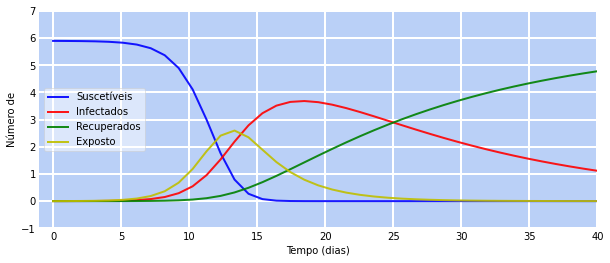

In [54]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Catole, S/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Catole, I/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_Catole, R/1000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_Catole, E_Catole/1000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=7)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Modelo SIS para os Dados do bairro das Malvinas

In [55]:
populacaoMalvinas = 10909
# taxaInfeccaoMalvinasCalculo = ((MalvinasDataSet.cum_casos[14] - MalvinasDataSet.cum_casos[0])/ populacaoMalvinas) * 100000
taxaInfeccaoMalvinasCalculo = 2.47
taxaInfeccaoMalvinasCalculo

2.47

In [56]:
I0_Malvinas = 1 # # Número Inicial de Indivíduos Infectados no Malvinas

R0_Malvinas = 0 # Número Inicial de Indivíduos Recuperados no Malvinas

S0_Malvinas = populacaoMalvinas - I0_Malvinas - R0_Malvinas # S0 = Suscetíveis à infecção inicialmente

E_Malvinas = 200

E0_Malvinas = 0

taxaIncubacao_Malvinas = 0.3

taxaInfeccaoMalvinas = taxaInfeccaoMalvinasCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Malvinas = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Malvinas = np.linspace(0, 40, 40)

In [57]:
def equacoesSEIRs(y_Malvinas, tempo_Malvinas, populacaoMalvinas, E_Malvinas, taxaIncubacao_Malvinas, taxaInfeccaoMalvinas, gama_Malvinas):
    S, E_Malvinas, I, R = y_Malvinas
    dSdt = -taxaInfeccaoMalvinas * S * I / populacaoMalvinas
    dEdt = taxaInfeccaoMalvinas * S * I / populacaoMalvinas - taxaIncubacao_Malvinas * E_Malvinas
    dIdt = taxaIncubacao_Malvinas * E_Malvinas - gama_Malvinas * I
    dRdt = gama_Malvinas * I
    return dSdt, dEdt, dIdt, dRdt

y0_Malvinas = S0_Malvinas, E0_Malvinas, I0_Malvinas, R0_Malvinas

i = odeint(equacoesSEIRs, y0_Malvinas, tempo_Malvinas, args=(populacaoMalvinas, E_Malvinas, taxaIncubacao_Malvinas, taxaInfeccaoMalvinas, gama_Malvinas))
S, E_Malvinas, I, R = i.T

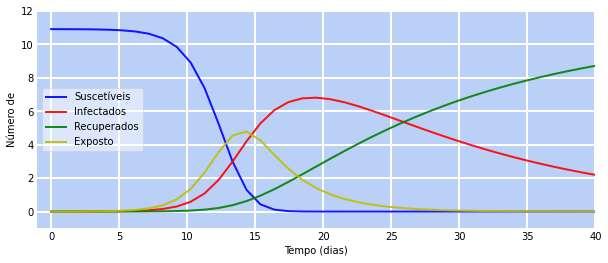

In [60]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Malvinas, S/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Malvinas, I/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.plot(tempo_Malvinas, R/1000, 'g', alpha=0.9, lw=2, label='Recuperados')
ax.plot(tempo_Malvinas, E_Malvinas/1000, 'y', alpha=0.9, lw=2, label='Exposto')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número de')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=12)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()